In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.layers import Input, Dense
sns.set()
import mplfinance as fplt


In [171]:
csv_path = "OP-USD.csv"
df = pd.read_csv(csv_path, parse_dates=["Date"])
df = df.sort_values("Date")
print(df["Date"].head())

0   2022-03-14
1   2022-03-15
2   2022-03-16
3   2022-03-17
4   2022-03-18
Name: Date, dtype: datetime64[ns]


In [157]:
print("MPLFinance Version : {}".format(fplt.__version__))
df['Date'] = pd.to_datetime(df['Date'])

# df.head()

# df.set_index('Date', inplace=True)
# df.head()
# fplt.plot(
#             df,
#             type='candle',
#             style='charles',
#             title='Apple, March - 2020',
#             ylabel='Price ($)',
#             figratio=(70,20)
#         )

MPLFinance Version : 0.12.10b0


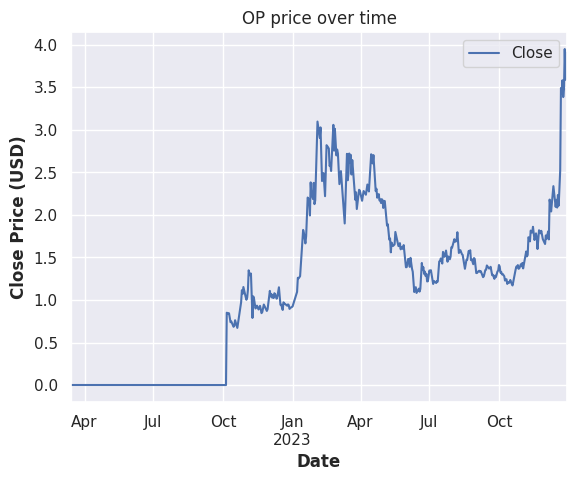

In [158]:
ax = df.plot(x="Date", y="Close")
ax.set_title("OP price over time")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
plt.show()

In [159]:
# Creating a new column Prediction which is created using shifted rows of "Close"
shifted_rows = 100
df["Prediction"] = df[["Close"]].shift(-shifted_rows)

print(df["Prediction"].head())
print(df["Close"].head())

0    0.000335
1    0.000343
2    0.000368
3    0.000364
4    0.000357
Name: Prediction, dtype: float64
0    0.000910
1    0.000883
2    0.000912
3    0.000844
4    0.000837
Name: Close, dtype: float64


In [160]:
# Creating training data for X, these values will be used to train the model
training_data = np.array(df[["Close"]][:-shifted_rows])
# print(training_data)

# Create training data for Y
y = (df["Prediction"].values)[:-shifted_rows]
# print(y)

In [161]:
# 80% of training_data will go to the variable called x_train
# 20% of training_data will go to the variable calles x_test

# 80% of y will go to the variable y_train
# 20% of y will go to the variable y_test

x_train, x_test, y_train, y_test = train_test_split(training_data, y, test_size=20)

In [162]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
linear_regression_confidence = linear_regression.score(x_test, y_test)
print(linear_regression_confidence)


0.20462688726446265


In [163]:
# Testing the model
future_values = np.array(df[["Close"]][-shifted_rows:])
linear_regression_prediction = linear_regression.predict(future_values)

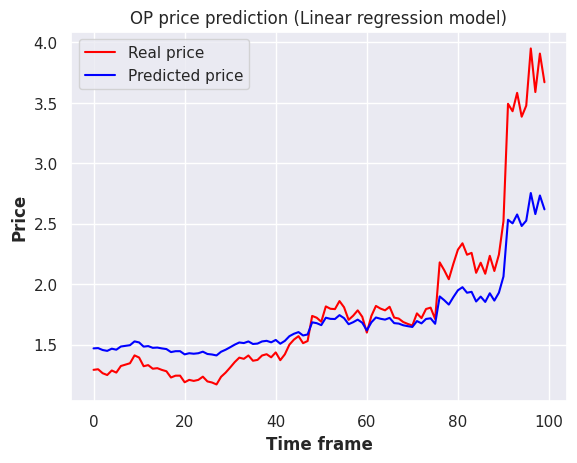

In [164]:
plt.plot(future_values, "red", label="Real price")
plt.plot(linear_regression_prediction, "blue", label="Predicted price")
plt.xlabel("Time frame")
plt.ylabel("Price")
plt.title("OP price prediction (Linear regression model)")
plt.legend()
plt.show()

In [165]:
# SVR model
svr_rbf = SVR(kernel="rbf", C=1e2, gamma=0.01)
svr_poly = SVR(kernel="poly", C=1e3, degree=2)
y_rbf = svr_rbf.fit(x_train, y_train)
y_poly = svr_poly.fit(x_train, y_train)

In [166]:
future_values = np.array(df[["Close"]][-shifted_rows:])
y_rbf_prediction = svr_rbf.predict(future_values)
y_poly_prediction = svr_poly.predict(future_values)

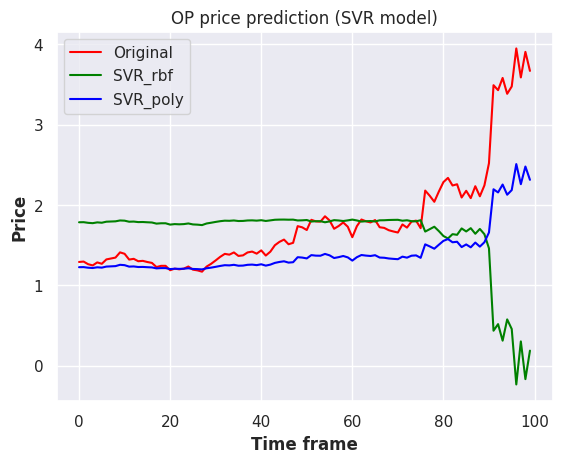

In [167]:
plt.plot(future_values, "red", label="Original")
plt.plot(y_rbf_prediction, "green", label="SVR_rbf")
plt.plot(y_poly_prediction, "blue", label="SVR_poly")
plt.xlabel("Time frame")
plt.ylabel("Price")
plt.title("OP price prediction (SVR model)")
plt.legend()
plt.show()

In [168]:
NN_model = Sequential()

# The input layer
NN_model.add(Dense(128, kernel_initializer="normal", input_dim=x_train.shape[1], activation="relu"))

# The hidden layer
NN_model.add(Dense(256, kernel_initializer="normal", activation="relu"))
NN_model.add(Dense(256, kernel_initializer="normal", activation="relu"))
NN_model.add(Dense(256, kernel_initializer="normal", activation="relu"))

# The output layer
NN_model.add(Dense(1, kernel_initializer="normal", activation="linear"))

# Compile the network
NN_model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])
NN_model.summary()

NN_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

/home/nurlan/projects/crypto_prediction/binance/bitcoin_using_RF/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,121 (645.00 KB)

 Trainable params: 165,121 (645.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2453 - mean_absolute_error: 1.2474 - val_loss: 0.6824 - val_mean_absolute_error: 0.6599
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7175 - mean_absolute_error: 0.7172 - val_loss: 0.6315 - val_mean_absolute_error: 0.6268
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6216 - mean_absolute_error: 0.6217 - val_loss: 0.6181 - val_mean_absolute_error: 0.6010
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5912 - mean_absolute_error: 0.5901 - val_loss: 0.6088 - val_mean_absolute_error: 0.5931
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5835 - mean_absolute_error: 0.5841 - val_loss: 0.5615 - val_mean_absolute_error: 0.5521
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5731 - mean_absolute_error: 0.5728 - val_loss: 0.5596 - val_mean_absolute_error: 0.5524
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5379 - mean_absolute_error: 0.5375 - val_loss: 0.55

In [169]:
future_values = np.array(df[["Close"]][-shifted_rows:])
NN_pred = NN_model.predict(future_values)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7336c2c4d1b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


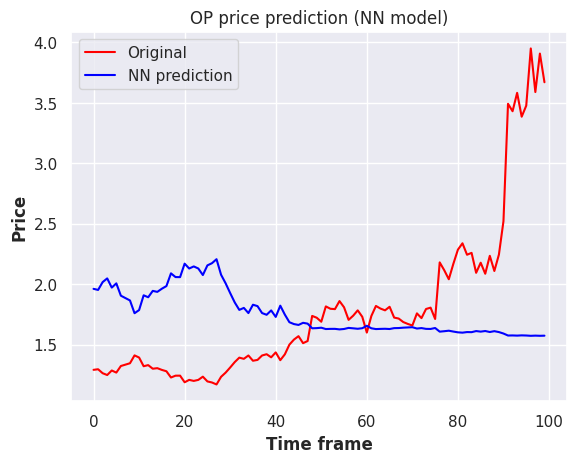

In [170]:
plt.plot(future_values, "red", label="Original")
plt.plot(NN_pred, "blue", label="NN prediction")
plt.xlabel("Time frame")
plt.ylabel("Price")
plt.title("OP price prediction (NN model)")
plt.legend()
plt.show()